In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import pandas as pd
from matplotlib.colors import LogNorm
from glob import glob
import os
import importlib
from qwind import constants
import pyagn
importlib.reload(pyagn)
from pyagn import sed
import plotting

In [2]:
M_range = np.geomspace(1e7,1e10, 10)
mdot_range = np.geomspace(0.05, 1, 10)

In [3]:
fractions = []
for M in M_range:
    for mdot in mdot_range:
        bh = sed.SED(M=M, mdot = mdot)
        fractions.append([bh.uv_fraction, bh.xray_fraction])
        

In [4]:
fractions = np.array(fractions)

In [5]:
fractions = fractions.reshape(10,10,2)

In [6]:
fraction_uv = fractions[...,0]
fraction_xray = fractions[...,1]

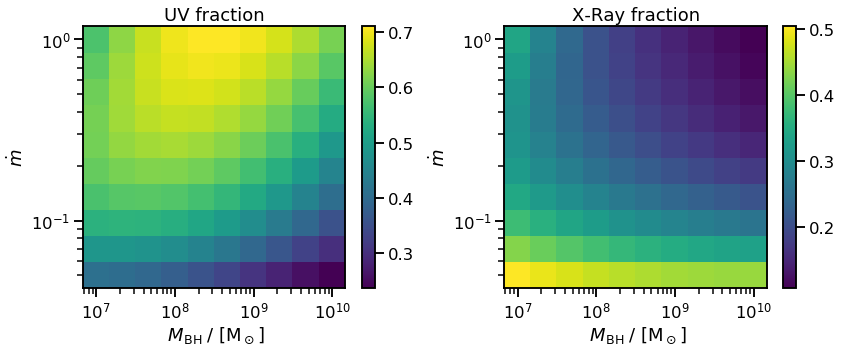

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

#uv = ax[0].pcolormesh(np.log10(M_range), np.log10(mdot_range), fraction_uv)
uv = plotting.pcolormesh_sensible(M_range, mdot_range, fraction_uv, ax[0]) 
plt.colorbar(uv, ax = ax[0])
ax[0].set_title("UV fraction")

#xr = ax[1].pcolormesh(np.log10(M_range), np.log10(mdot_range), fraction_xray)
xr = plotting.pcolormesh_sensible(M_range, mdot_range, fraction_xray, ax[1]) 
plt.colorbar(xr, ax = ax[1])
ax[1].set_title("X-Ray fraction")

for axis in ax:
    axis.set_xlabel(r"$\;M_\mathrm{BH} \;/$ [M$_\odot$]")
    axis.set_ylabel(r"$ \dot m$")
#    labels = [item.get_text().replace("−", "-") for item in ax[0].get_yticklabels()]
    
    #labels = [10**float(label) for label in labels]
    #ax[0].set_xticklabels(labels)

plt.tight_layout()
#labels = [float(item.get_text().replace("−", "-")) for item in ax[0].get_yticklabels()]
#labels_new = ["%.2f"%(10**label) for label in labels]
#a = ax[0].set_yticklabels(labels_new)

#labels = [float(item.get_text().replace("−", "-")) for item in ax[1].get_yticklabels()]
#labels_new = ["%.2f"%(10**label) for label in labels]
#b = ax[1].set_yticklabels(labels_new)
plt.savefig("../../UV_XR_fractions.png", dpi=200, bbox_to_inches="tight")

In [80]:
asd = ax[0].get_yticklabels()[0]

In [85]:
a = asd.get_text()

In [94]:
a

'−1.4'

In [97]:
a.replace("−", "-")

'-1.4'

In [98]:
float(a)

-1.4

In [104]:
labels = [item.get_text().replace("−", "-") for item in ax[0].get_yticklabels()]

In [105]:
labels

['-1.4', '-1.2', '-1.0', '-0.8', '-0.6', '-0.4', '-0.2', '0.0']